# Postprocessing

In [119]:
import re
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read validation data

In [120]:
def read_validation_directory():
    available_content = os.listdir('.') 
    select_pattern = re.compile('^validation-[a-z][a-z][a-z]')
    selected_dir = [content for content in available_content if select_pattern.match(content)]
    return selected_dir

In [121]:
def read_validation_directory_content(validation_directories):
    iteration = 0
    for directory in validation_directories:
        available_content = os.listdir(directory)
        for file in available_content:
            if iteration == 0:
                imported_data = pd.read_csv('{}/{}'.format(directory, file))
                imported_data['model'] = directory[11:]
            else:
                tmp_data = pd.read_csv('{}/{}'.format(directory, file)) 
                tmp_data['model'] = directory[11:] 
                imported_data = pd.concat([imported_data, tmp_data])
            iteration += 1
    
    imported_data.reset_index(drop=True, inplace=True)
    return imported_data

In [122]:
def text_split(x):
    y = x.split('-')
    return y

In [123]:
def extract_feature_information(df):
    
    df_splitted = df['data'].apply(text_split)
    
    feature_method_list = []
    document_size_list = []
    feature_size_list = []
    ngram_size_list = []
    
    for splitted_entries in df_splitted:
        if splitted_entries[1] == 'idf': # inverse document frequency case
            feature_method_list.append('tf-idf')
            document_size_list.append(splitted_entries[2])
            feature_size_list.append(splitted_entries[3])
            ngram_size_list.append(splitted_entries[4])
        else:
            feature_method_list.append('tf')
            document_size_list.append(splitted_entries[1])
            feature_size_list.append(splitted_entries[2])
            ngram_size_list.append(splitted_entries[3])
    
    df['method'] = feature_method_list
    df['doc'] = document_size_list
    df['feature'] = feature_size_list
    df['ngram'] = ngram_size_list
    df.drop(['data'], axis=1, inplace=True)
    
    # set index
    df.index = df['model'] + '-' + df['method'] + '-' + df['doc'] + '-' + df['feature'] + '-' + df['ngram']
    
    return df

In [124]:
def to_percent(x):
    return round(x * 100, 2)

In [125]:
def read_results():
    validation_directories = read_validation_directory()
    raw_results = read_validation_directory_content(validation_directories)
    results = extract_feature_information(raw_results)
    results.sort_values(by=['validation_accuracy'], ascending=False, inplace=True)
    results['validation_accuracy'] = to_percent(results['validation_accuracy'])
    results['test_accuracy'] = to_percent(results['test_accuracy'])
    return results

In [126]:
# read from all validation directories the accuracy and determine model settings
results = read_results()
results.head(results.shape[0]) # display all

,validation_accuracy,test_accuracy,model,method,doc,feature,ngram
svc-tf-idf-5000-1000-1,97.36,96.02,svc,tf-idf,5000,1000,1
svc-tf-5000-5000-1,97.05,96.13,svc,tf,5000,5000,1
svc-tf-5000-1000-1,96.54,95.31,svc,tf,5000,1000,1
svc-tf-idf-5000-5000-1,96.03,95.21,svc,tf-idf,5000,5000,1
log-tf-idf-5000-1000-1,95.83,94.70,log,tf-idf,5000,1000,1
log-tf-idf-5000-5000-1,95.83,95.31,log,tf-idf,5000,5000,1
svc-tf-idf-5000-500-1,95.73,95.41,svc,tf-idf,5000,500,1
svc-tf-5000-500-1,95.42,95.11,svc,tf,5000,500,1
log-tf-idf-5000-500-1,95.02,93.78,log,tf-idf,5000,500,1
log-tf-5000-5000-1,93.18,92.25,log,tf,5000,5000,1


## Read tuned models

In [127]:
def read_tuned_model_directory_content(prefix):
    path = 'tuned-model-{}'.format(prefix)
    available_content = os.listdir(path)
    iteration = 0
    for file in available_content:
        if iteration == 0:
            imported_data = pd.read_csv('{}/{}'.format(path, file))
            imported_data['model'] = prefix
        else:
            tmp_data = pd.read_csv('{}/{}'.format(path, file)) 
            tmp_data['model'] = prefix
            imported_data = pd.concat([imported_data, tmp_data])
        iteration += 1   
            
    imported_data.reset_index(drop=True, inplace=True)
    return imported_data    

In [128]:
def read_tuned_model_results(prefix):
    raw_results = read_tuned_model_directory_content(prefix)
    results = extract_feature_information(raw_results)
    return results

In [129]:
def join_with_accuracy(tuned_model_results, accuracy_results):
    accuracy_drop = accuracy_results.drop(['model', 'method', 'doc', 'feature', 'ngram'], axis=1)
    tuned_model_results = tuned_model_results.join(accuracy_drop, how='inner')
    tuned_model_results.sort_values(by=['validation_accuracy'], ascending=False, inplace=True)
    tuned_model_results.reset_index(drop=True, inplace=True)
    return tuned_model_results

In [130]:
def evaluate_average_performance(df, group_variable):
    performance = df[['validation_accuracy', group_variable]].groupby([group_variable]).mean()
    performance.sort_values(by=['validation_accuracy'], ascending=False, inplace=True)
    return performance

## k nearest neighbors model

In [131]:
results_knn = read_tuned_model_results('knn')
results_knn = join_with_accuracy(results_knn, results)
results_knn.head(results_knn.shape[0]) # display all

,p,weights,n_neighbors,model,method,doc,feature,ngram,validation_accuracy,test_accuracy
0,1,uniform,13,knn,tf-idf,5000,1000,1,92.07,92.25
1,1,uniform,13,knn,tf,5000,1000,1,91.56,92.66
2,1,distance,8,knn,tf,5000,500,1,91.15,92.35
3,1,distance,12,knn,tf-idf,5000,500,1,90.74,91.95
4,1,uniform,15,knn,tf,5000,5000,1,89.83,91.13
5,6,distance,4,knn,tf,5000,1000,2,79.45,81.35
6,1,distance,6,knn,tf-idf,5000,5000,1,79.25,79.41
7,7,distance,7,knn,tf,5000,500,2,79.25,81.24
8,6,distance,3,knn,tf,5000,5000,2,79.04,80.84
9,8,distance,3,knn,tf-idf,5000,1000,2,78.03,78.90


## Support vector models

In [132]:
results_svc = read_tuned_model_results('svc')
results_svc = join_with_accuracy(results_svc, results)
results_svc.head(results_svc.shape[0]) # display all

,random_state,degree,kernel,C,model,method,doc,feature,ngram,validation_accuracy,test_accuracy
0,1,2,poly,2.953042,svc,tf-idf,5000,1000,1,97.36,96.02
1,1,2,poly,2.815403,svc,tf,5000,5000,1,97.05,96.13
2,1,2,poly,1.097294,svc,tf,5000,1000,1,96.54,95.31
3,1,2,poly,3.000000,svc,tf-idf,5000,5000,1,96.03,95.21
4,1,2,poly,2.811214,svc,tf-idf,5000,500,1,95.73,95.41
5,1,2,poly,3.000000,svc,tf,5000,500,1,95.42,95.11
6,1,2,poly,3.000000,svc,tf,5000,500,2,90.13,88.58
7,1,2,poly,2.839080,svc,tf,5000,1000,2,89.73,90.01
8,1,2,poly,2.449617,svc,tf-idf,5000,1000,2,89.22,89.40
9,1,2,poly,2.973663,svc,tf-idf,5000,5000,2,89.11,88.48


## Logistic regression model

In [133]:
results_log = read_tuned_model_results('log')
results_log = join_with_accuracy(results_log, results)
results_log.head(results_log.shape[0]) # display all

,C,max_iter,model,method,doc,feature,ngram,validation_accuracy,test_accuracy
0,2.489134,10000,log,tf-idf,5000,5000,1,95.83,95.31
1,2.994826,10000,log,tf-idf,5000,1000,1,95.83,94.70
2,2.570000,10000,log,tf-idf,5000,500,1,95.02,93.78
3,2.992811,10000,log,tf,5000,500,1,93.18,91.95
4,2.756580,10000,log,tf,5000,5000,1,93.18,92.25
5,2.785545,10000,log,tf,5000,1000,1,92.98,91.85
6,0.340278,10000,log,tf-idf,5000,500,2,92.17,92.86
7,2.785293,10000,log,tf,5000,500,2,91.56,91.74
8,2.687865,10000,log,tf,5000,1000,2,91.45,92.15


## Model performance

In [134]:
def create_boxplot(df, x, y, output):
    %matplotlib inline
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(x=x, y=y,data=df, palette='Set1') 
    fig.savefig(output)

In [135]:
model_performance = evaluate_average_performance(results, 'model')
model_performance

,validation_accuracy
model,
log,93.466667
svc,92.743333
knn,83.640000


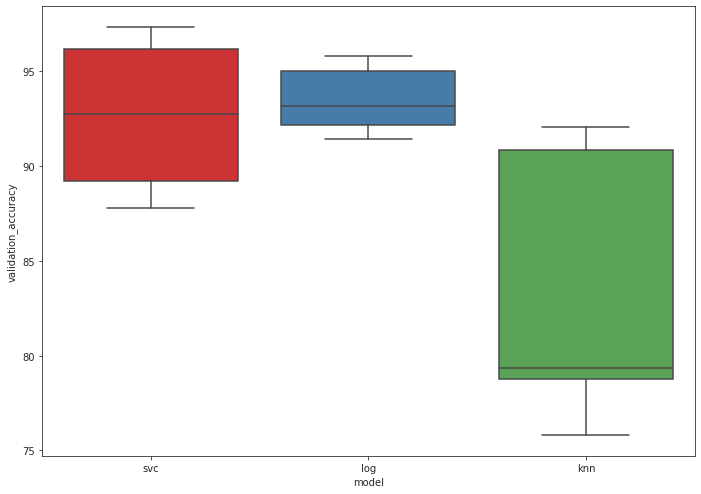

In [136]:
create_boxplot(results, 'model', 'validation_accuracy', 'model_performance.png')

## Feature number performance

In [137]:
feature_performance = evaluate_average_performance(results, 'feature')
feature_performance

,validation_accuracy
feature,
1000,90.383636
500,90.056667
5000,88.290000


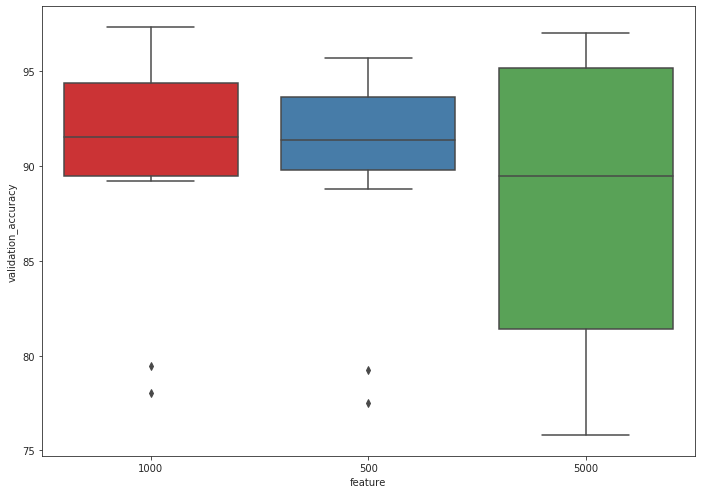

In [138]:
create_boxplot(results, 'feature', 'validation_accuracy', 'feature_performance.png')

## Feature method performance

In [139]:
method_performance = evaluate_average_performance(results, 'method')
method_performance

,validation_accuracy
method,
tf,89.958235
tf-idf,89.281875


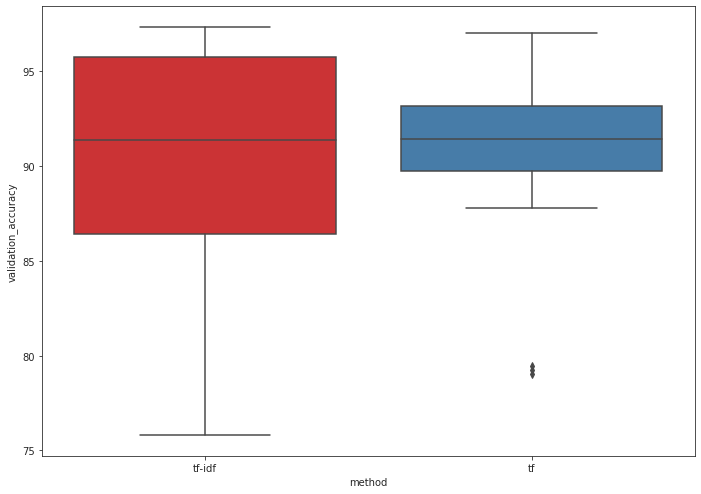

In [140]:
create_boxplot(results, 'method', 'validation_accuracy', 'method_performance.png')

## n-gram performance

In [141]:
ngram_performance = evaluate_average_performance(results, 'ngram')
ngram_performance

,validation_accuracy
ngram,
1,93.263889
2,85.270000


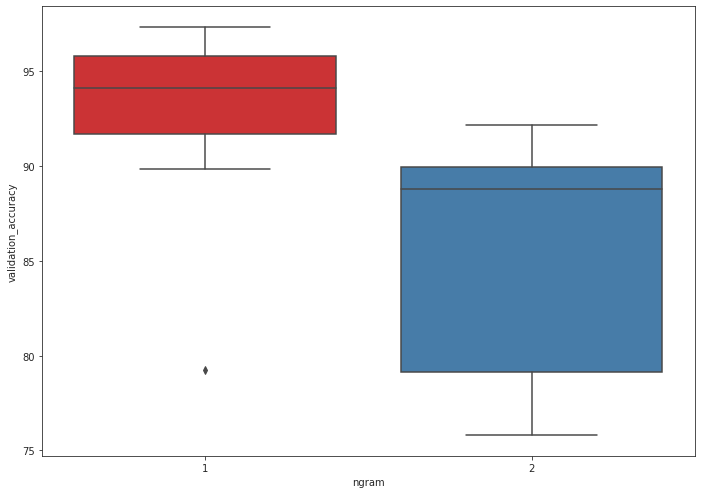

In [142]:
create_boxplot(results, 'ngram', 'validation_accuracy', 'ngram_performance.png')